Sabrina Herman_202331241

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('rice_field.csv', sep = ';' )
df

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


Dataset dibaca dari file CSV menggunakan pd.read_csv(). Ini merupakan langkah awal untuk memuat data yang akan digunakan dalam analisis.

In [16]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


(   Production (X)  Harvest Area (Y)
 0       1329536.0          323589.0
 1       1299699.0          329041.0
 2       1382905.0          339253.0
 3       1419128.0          348223.0
 4       1368074.0          337561.0,
 None)

Dengan menggunakan df.head() dan df.info(), kita dapat melihat beberapa baris pertama dari dataset serta informasi mengenai kolom dan tipe data. Ini membantu dalam memahami struktur data dan mengecek apakah ada nilai yang hilang.

In [18]:
df.corr()

,Production (X),Harvest Area (Y)
Production (X),1.000000,0.777446
Harvest Area (Y),0.777446,1.000000


In [22]:
X = df[['Production (X)']].values 
y = df['Harvest Area (Y)'].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[:5], y[:5]

(array([[0.26592762],
        [0.2597606 ],
        [0.27695849],
        [0.28444544],
        [0.27389306]]),
 array([323589., 329041., 339253., 348223., 337561.]))

Dalam kode, terdapat penggunaan MinMaxScaler untuk menormalkan fitur Production (X). Normalisasi penting untuk memastikan bahwa fitur memiliki skala yang sama, sehingga tidak ada fitur yang mendominasi dalam proses pelatihan model.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

Model yang digunakan dalam kode ini adalah LinearRegression dari sklearn.

In [33]:
intercept = model.intercept_
coefficient = model.coef_[0]

intercept, coefficient

(72480.76289388438, 0.15675597652620943)

In [35]:
y_pred = model.predict(X_test)

Pengujian model

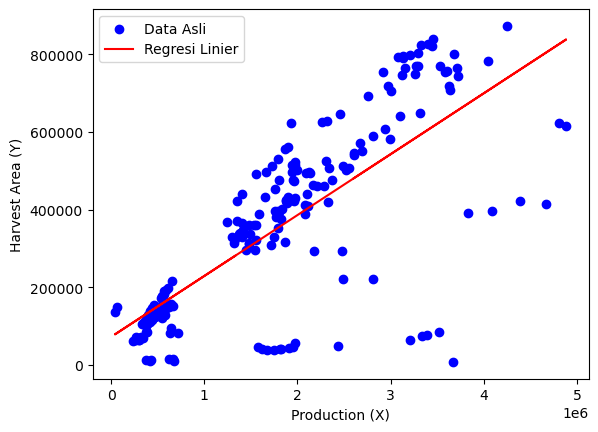

In [37]:
plt.scatter(X, y, color="blue", label="Data Asli")
plt.plot(X, model.predict(X), color="red", label="Regresi Linier")
plt.xlabel("Production (X)")
plt.ylabel("Harvest Area (Y)")
plt.legend()
plt.show()

Visualisasi data menggunakan scatter plot

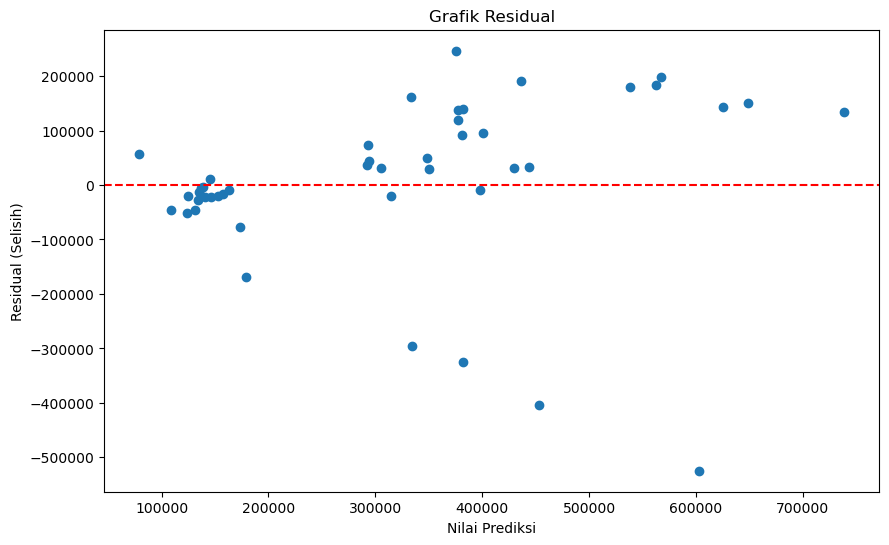

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Garis horizontal di nol
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Selisih)")
plt.title("Grafik Residual")
plt.show()

visualisasi data menggunakan grafik residual

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 104405.09756940794
Mean Squared Error (MSE): 23478915853.091366
Root Mean Squared Error (RMSE): 153228.3128311846
R-squared (R²): 0.6170620266475468


Analisis Akurasi Model